In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from os import path
import sys
sys.path.append(path.join(".."))

import saly
import saly.backend as S
import pandas as pd
import numpy as np
import scanpy as scpy
import scipy as sci
import anndata as ann

%load_ext autoreload
%autoreload 2

EPOCHS = 6
SPECIES = 'Mouse'
DATA_PATH = '/home/mlongar/Data/SingleCellGeneExpression/'
DATASET_HRVATIN_PATH = DATA_PATH + 'hrvatin_2018.h5ad' 
DATASET_CHEN_PATH = DATA_PATH + 'chen_2017.h5ad'
DATASET_ZHENG_PATH = DATA_PATH + '10x_mouse_1.3mln.h5ad'
DATASET_TABULA_MURIS_PATH = '/home/mlongar/Data/TabulaMuris/TabulaMuris.h5ad'
MARKER_PATH = DATA_PATH + 'panglao_gene_markers.tab.gz'

Using TensorFlow backend.


In [2]:
zheng_data = saly.load_h5ad(DATASET_ZHENG_PATH)
print("ZHENG DATA\n", zheng_data.shape)

ZHENG DATA
 (1306127, 27932)


In [3]:
muris_data = saly.load_h5ad(DATASET_TABULA_MURIS_PATH)
print("MURIS DATA\n", muris_data.shape)

MURIS DATA
 (44949, 23433)


In [4]:
hrvatin_data = saly.load_h5ad(DATASET_HRVATIN_PATH)
print("HRVATIN DATA\n", hrvatin_data.shape)

HRVATIN DATA
 (48266, 25186)


In [5]:
chen_data = saly.load_h5ad(DATASET_CHEN_PATH)
print("CHEN DATA\n", chen_data.shape)

CHEN DATA
 (14437, 23284)


In [6]:
unknown_cells = ['nan', 'bladder cell', 'bladder urothelial cell', 'mesenchymal stem cell of adipose',
                 'mesenchymal stem cell', 'DN1 thymic pro-T cell', 'lymphocyte',
                 'epidermal cell', 'keratinocyte stem cell', 'basal cell of epidermis', 'stem cell of epidermis',
                 'leukocyte', 'mesenchymal cell', 'blood cell', 'skeletal muscle satellite stem cell',
                 'skeletal muscle satellite cell', 'Slamf1-positive multipotent progenitor cell',
                 'megakaryocyte-erythroid progenitor cell', 'late pro-B cell', 'common lymphoid progenitor',
                 'granulocyte monocyte progenitor cell', 'immature natural killer cell',
                 'Slamf1-negative multipotent progenitor cell', 'pre-natural killer cell',
                 'immature NK T cell', 'Brush cell of epithelium proper of large intestine',
                 'enterocyte of epithelium of large intestine', 'endothelial cell of hepatic sinusoid',
                 'endocardial cell', 'professional antigen presenting cell']

In [7]:
chen_data = saly.drop_rows(chen_data, ['tanycyte', 'unknown', 'ependymal cell', 'epithelial cell'])
hrvatin_data = saly.drop_rows(hrvatin_data, ['Muscle cell'])

muris_unknown = saly.drop_rows(muris_data, [x for x in muris_data.obs['labels'].unique() if x not in unknown_cells])
muris_data = saly.drop_rows(muris_data, unknown_cells)

Dropped 4750 cell(s). New shape: (9687, 23284)
Dropped 621 cell(s). New shape: (47645, 25186)
Dropped 31577 cell(s). New shape: (13372, 23433)
Dropped 13372 cell(s). New shape: (31577, 23433)


In [8]:
markers_db = saly.load_markers(MARKER_PATH, SPECIES)
markers = saly.get_mutual_markers([hrvatin_data, chen_data, zheng_data, muris_data], markers_db)
print('Mutual markers:', len(markers))

Mutual markers: 7382


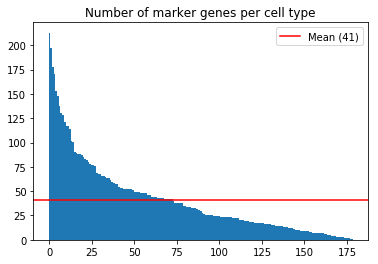

In [9]:
saly.plot_marker_genes(markers)

In [10]:
marker_aliases = {'Neuron' : 'Neurons', 'neuron' : 'Neurons',
                  'Oligodendrocyte' : 'Oligodendrocytes', 'oligodendrocyte' : 'Oligodendrocytes',
                  'Endothelial cell' : 'Endothelial cells', 'endothelial cell' : 'Endothelial cells',
                  'lung endothelial cell' : 'Endothelial cells', 'epithelial cell' : 'Epithelial cells',
                  'epithelial cell of lung' : 'Airway epithelial cells', 'classical monocyte' : 'Monocytes',
                  'luminal epithelial cell of mammary gland' : 'Luminal epithelial cells',
                  'epithelial cell of large intestine' : 'Epithelial cells',
                  'kidney collecting duct epithelial cell' : 'Distal tubule cells',
                  'epithelial cell of proximal tubule' : 'Proximal tubule cells',
                  'Astrocyte' : 'Astrocytes', 'astrocyte' : 'Astrocytes', 'Macrophage' : 'Macrophages', 
                  'macrophage' : 'Macrophages', 'OPC' : 'Oligodendrocyte progenitor cells',
                  'oligodendrocyte precursor cell' : 'Oligodendrocyte progenitor cells', 'Pericyte' : 'Pericytes',
                  'brain pericyte' : 'Pericytes', 'B cell' : 'B cells', 'T cell' : 'T cells',
                  'Bergmann glial cell' : 'Bergmann glia', 'natural killer cell' : 'NK cells',
                  'hematopoietic precursor cell' : 'Hematopoietic stem cells', 'stromal cell' : 'Stromal cells',
                  'ciliated columnar cell of tracheobronchial tree' : 'Ciliated cells', 'microglial cell' : 'Microglia',
                  'pancreatic A cell' : 'Alpha cells', 'type B pancreatic cell' : 'Beta cells',
                  'pancreatic acinar cell' : 'Acinar cells', 'pancreatic PP cell' : 'Gamma (PP) cells',
                  'pancreatic D cell' : 'Delta cells', 'pancreatic stellate cell' : 'Pancreatic stellate cells',
                  'keratinocyte' : 'Keratinocytes', 'myofibroblast cell' : 'Myofibroblasts',
                  'pancreatic ductal cell' : 'Ductal cells', 'immature T cell' : 'T cells naive', 'basal cell' : 'Basal cells',
                  'granulocyte' : 'Myeloid-derived suppressor cells', 'monocyte' : 'Monocytes',
                  'granulocytopoietic cell' : 'Myeloid-derived suppressor cells',
                  'myeloid cell': 'Myeloid-derived suppressor cells', 'basophil' : 'Basophils',
                  'immature B cell' : 'B cells naive', 'naive B cell' : 'B cells naive', 'precursor B cell' : 'B cells naive',
                  'regulatory T cell' : 'T regulatory cells', 'mature natural killer cell' : 'NK cells',
                  'large intestine goblet cell' : 'Goblet cells', 'enteroendocrine cell': 'Enteroendocrine cells',
                  'smooth muscle cell' : 'Smooth muscle cells', 'cardiac muscle cell' : 'Cardiomyocytes',
                  'hepatocyte' : 'Hepatocytes', 'Kupffer cell' : 'Kupffer cells', 'fibroblast' : 'Fibroblasts',
                  'erythrocyte' : 'Erythroid-like and erythroid precursor cells'}

saly.check_labels([hrvatin_data, chen_data, muris_data], markers, marker_aliases)

In [11]:
hrvatin_data = saly.drop_unused_genes(hrvatin_data, markers)
chen_data = saly.drop_unused_genes(chen_data, markers)
zheng_data = saly.drop_unused_genes(zheng_data, markers)
muris_data = saly.drop_unused_genes(muris_data, markers)
muris_unknown = saly.drop_unused_genes(muris_unknown, markers)

saly.check_shape([hrvatin_data, chen_data, zheng_data, muris_data, muris_unknown])

Dropped 21107 gene(s). New shape: (47645, 4079)
Dropped 19205 gene(s). New shape: (9687, 4079)
Dropped 23853 gene(s). New shape: (1306127, 4079)
Dropped 19354 gene(s). New shape: (31577, 4079)
Dropped 19354 gene(s). New shape: (13372, 4079)


In [12]:
muris_unknown_labels = muris_unknown.obs['labels']

In [13]:
zheng_data = saly.mark_as_unlabelled(zheng_data.copy())
muris_unknown = saly.mark_as_unlabelled(muris_unknown.copy())

In [14]:
train_data, _, _ = saly.preprocess_data(zheng_data, splits=10,
                                       train=1, test=0, validation=0)

In [15]:
train_muris, test_muris, val_muris = saly.preprocess_data(muris_data, splits=1, train=0.7, test=0.15, validation=0.15)

In [16]:
chen_data = S.normalize_data(chen_data.copy())
hrvatin_data = S.normalize_data(hrvatin_data.copy())

In [17]:
model, marker_model, encoder_model = saly.build_model(train_data, markers, supervised=False);

In [18]:
model_supervised, marker_supervised, _ = saly.build_model(muris_data, markers, supervised=True);

In [52]:
len(markers_c)

11461

In [19]:
history = saly.train_model(model, train_data, markers, marker_aliases,
                           EPOCHS, validation_data=chen_data, verbose=1)

Train on 1306127 samples, validate on 9687 samples
Epoch 1/6
1306127/1306127 [==============================] - 103s 79us/step - loss: 2103.6214 - cell_activations_loss: 0.0000e+00 - output_loss: 2.1036 - cell_activations_celltype_accuracy: 0.0012 - val_loss: 3008.2723 - val_cell_activations_loss: 0.0000e+00 - val_output_loss: 3.0083 - val_cell_activations_celltype_accuracy: 0.7447
Epoch 2/6
1306127/1306127 [==============================] - 99s 76us/step - loss: 2030.4601 - cell_activations_loss: 0.0000e+00 - output_loss: 2.0305 - cell_activations_celltype_accuracy: 4.6397e-04 - val_loss: 3201.4168 - val_cell_activations_loss: 0.0000e+00 - val_output_loss: 3.2014 - val_cell_activations_celltype_accuracy: 0.7305
Epoch 3/6
1306127/1306127 [==============================] - 98s 75us/step - loss: 2012.6840 - cell_activations_loss: 0.0000e+00 - output_loss: 2.0127 - cell_activations_celltype_accuracy: 5.8723e-04 - val_loss: 3100.4931 - val_cell_activations_loss: 0.0000e+00 - val_output_los

In [20]:
model_supervised.set_weights(model.get_weights())

In [21]:
history_supervised = saly.train_model(model_supervised, train_muris, markers, marker_aliases, 
                                      10, validation_data=val_muris, verbose=1)

Train on 22103 samples, validate on 9474 samples
Epoch 1/10
22103/22103 [==============================] - 14s 647us/step - loss: 317.6324 - cell_activations_loss: 7.2434 - output_loss: 3.1039 - cell_activations_celltype_accuracy: 0.5401 - val_loss: 297.0828 - val_cell_activations_loss: 6.4195 - val_output_loss: 2.9066 - val_cell_activations_celltype_accuracy: 0.5974
Epoch 2/10
22103/22103 [==============================] - 12s 564us/step - loss: 296.3516 - cell_activations_loss: 6.2743 - output_loss: 2.9008 - cell_activations_celltype_accuracy: 0.6055 - val_loss: 288.9891 - val_cell_activations_loss: 5.9615 - val_output_loss: 2.8303 - val_cell_activations_celltype_accuracy: 0.6238
Epoch 3/10
22103/22103 [==============================] - 12s 549us/step - loss: 290.2933 - cell_activations_loss: 5.6988 - output_loss: 2.8459 - cell_activations_celltype_accuracy: 0.6409 - val_loss: 284.8224 - val_cell_activations_loss: 5.3267 - val_output_loss: 2.7950 - val_cell_activations_celltype_accur

In [22]:
chen_baseline = saly.get_baseline(chen_data, markers)
validation_baseline = saly.get_results(chen_data.obs['labels'], chen_baseline.X.toarray(), markers, marker_aliases)

Correct predictions: 6623 out of 9687 (68.37%)
	Neuron: 42.07% (974/2315) | Markers: 197
	Oligodendrocyte: 77.15% (2732/3541) | Markers: 85
	OPC: 95.48% (1711/1792) | Markers: 28
	Astrocyte: 57.4% (659/1148) | Markers: 61
	Microglia: 70.99% (514/724) | Markers: 80
	Macrophage: 19.76% (33/167) | Markers: 130


In [23]:
hrvatin_baseline = saly.get_baseline(hrvatin_data, markers)
saly.get_results(hrvatin_data.obs['labels'], hrvatin_baseline.X.toarray(), markers, marker_aliases);

Correct predictions: 25021 out of 47645 (52.52%)
	Neuron: 10.37% (1579/15223) | Markers: 197
	Oligodendrocyte: 63.82% (5508/8630) | Markers: 85
	Astrocyte: 75.72% (5330/7039) | Markers: 61
	Endothelial cell: 50.61% (1746/3450) | Markers: 178
	Macrophage: 1.68% (9/537) | Markers: 130
	Microglia: 89.09% (9050/10158) | Markers: 80
	OPC: 97.81% (1786/1826) | Markers: 28
	Pericyte: 1.66% (13/782) | Markers: 64


In [25]:
chen_cell_activations = marker_supervised.predict(chen_data.X)
saly.get_results(chen_data.obs['labels'], chen_cell_activations, markers, marker_aliases);

Correct predictions: 9337 out of 9687 (96.39%)
	Neuron: 98.23% (2274/2315) | Markers: 197
	Oligodendrocyte: 98.39% (3484/3541) | Markers: 85
	OPC: 97.66% (1750/1792) | Markers: 28
	Astrocyte: 95.21% (1093/1148) | Markers: 61
	Microglia: 88.26% (639/724) | Markers: 80
	Macrophage: 58.08% (97/167) | Markers: 130


In [26]:
hrvatin_cell_activations = marker_supervised.predict(hrvatin_data.X)
saly.get_results(hrvatin_data.obs['labels'], hrvatin_cell_activations, markers, marker_aliases);

Correct predictions: 46097 out of 47645 (96.75%)
	Neuron: 98.12% (14937/15223) | Markers: 197
	Oligodendrocyte: 91.01% (7854/8630) | Markers: 85
	Astrocyte: 99.91% (7033/7039) | Markers: 61
	Endothelial cell: 99.97% (3449/3450) | Markers: 178
	Macrophage: 65.36% (351/537) | Markers: 130
	Microglia: 97.19% (9873/10158) | Markers: 80
	OPC: 99.73% (1821/1826) | Markers: 28
	Pericyte: 99.62% (779/782) | Markers: 64


In [27]:
chen_cell_activations_unspervised = marker_model.predict(chen_data.X)

In [28]:
hrvatin_cell_activations_unspervised = marker_model.predict(hrvatin_data.X)

# Analysis

../saly/backend/analysis.py:105: RuntimeWarning: invalid value encountered in true_divide
  recall = tp / (tp + fn)
/home/mlongar/miniconda/envs/MG/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


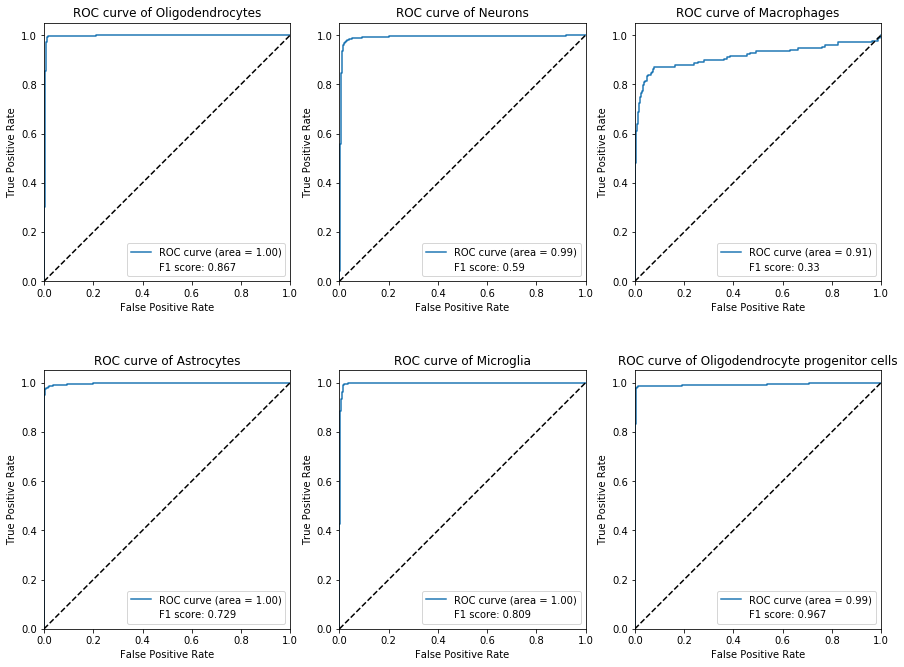

In [29]:
saly.draw_roc(chen_data.obs['labels'], chen_baseline.X.toarray(), markers, marker_aliases)

IndexError: list index out of range

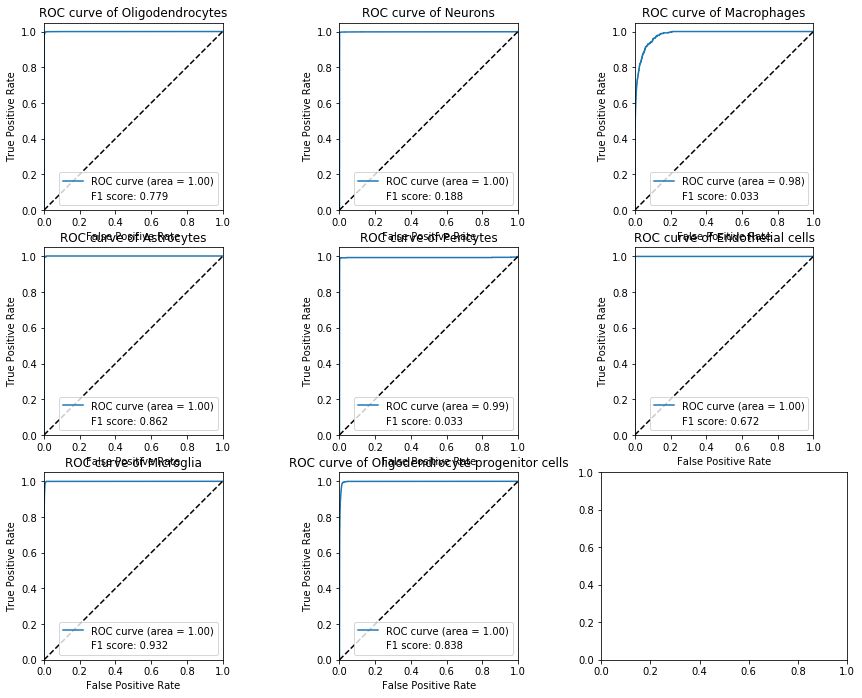

In [30]:
saly.draw_roc(hrvatin_data.obs['labels'], hrvatin_baseline.X.toarray(), markers, marker_aliases)

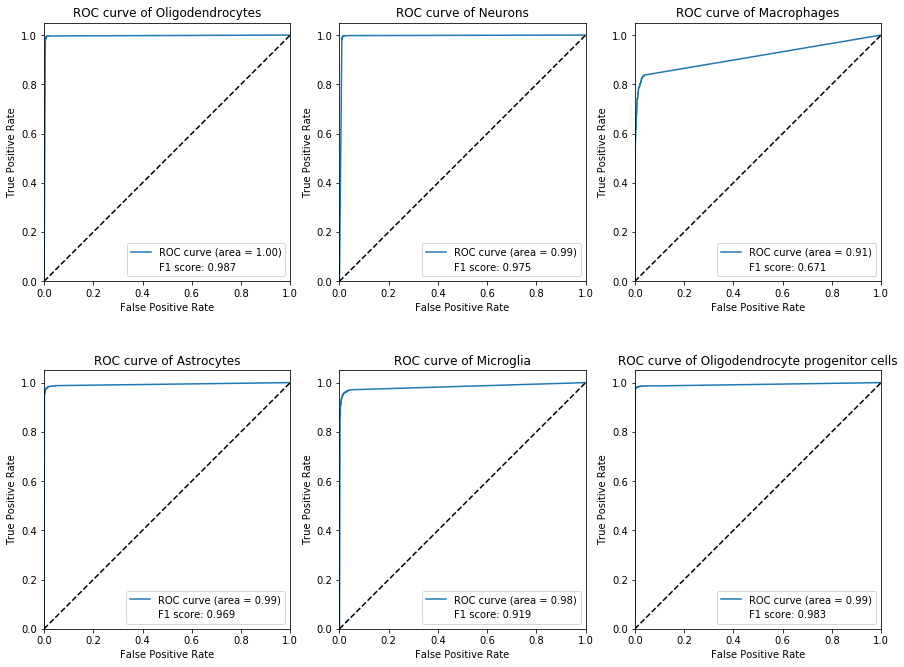

In [32]:
saly.draw_roc(chen_data.obs['labels'], chen_cell_activations, markers, marker_aliases)

IndexError: list index out of range

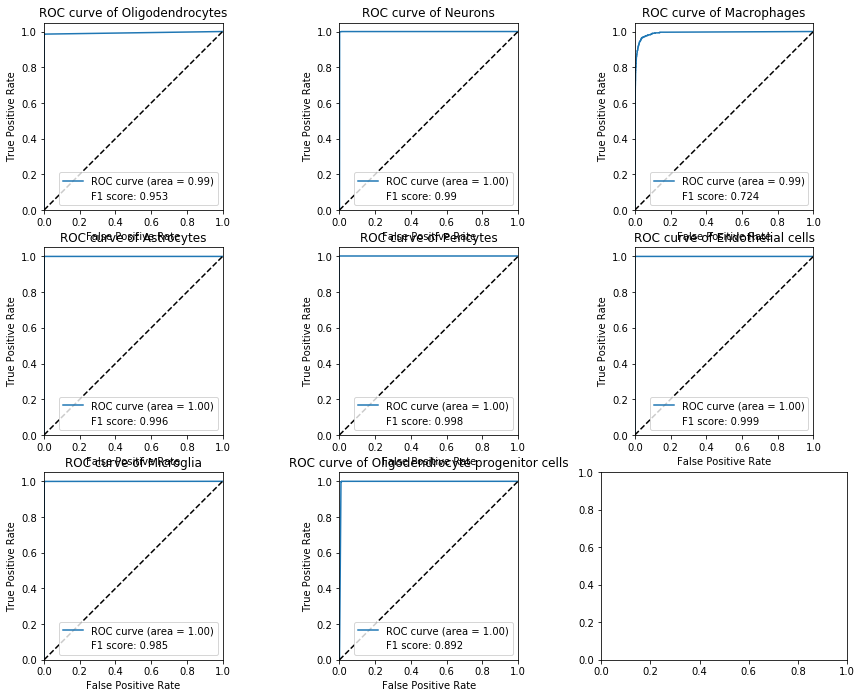

In [33]:
saly.draw_roc(hrvatin_data.obs['labels'], hrvatin_cell_activations, markers, marker_aliases)

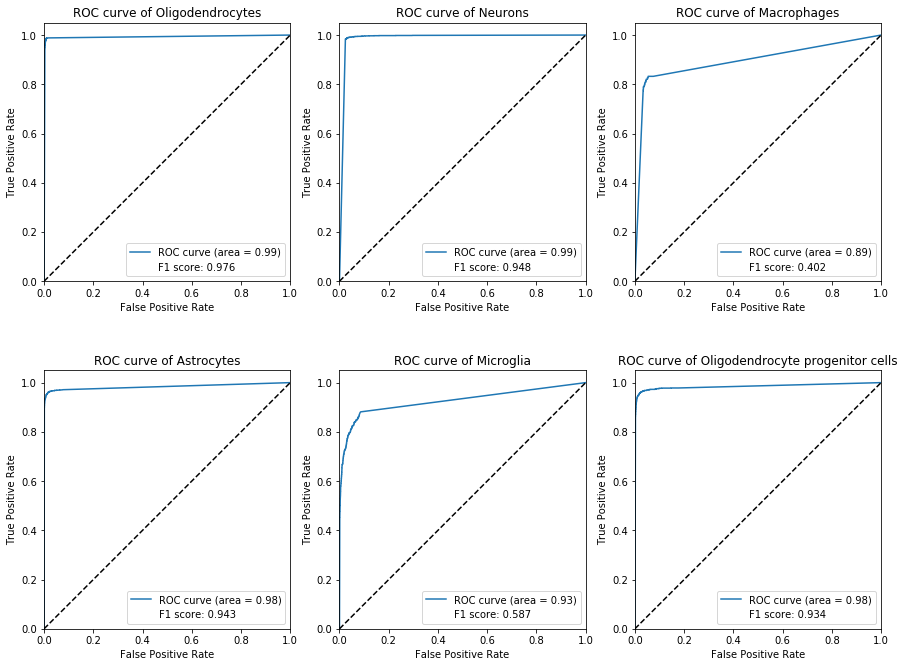

In [34]:
saly.draw_roc(chen_data.obs['labels'], chen_cell_activations_unspervised, markers, marker_aliases)

IndexError: list index out of range

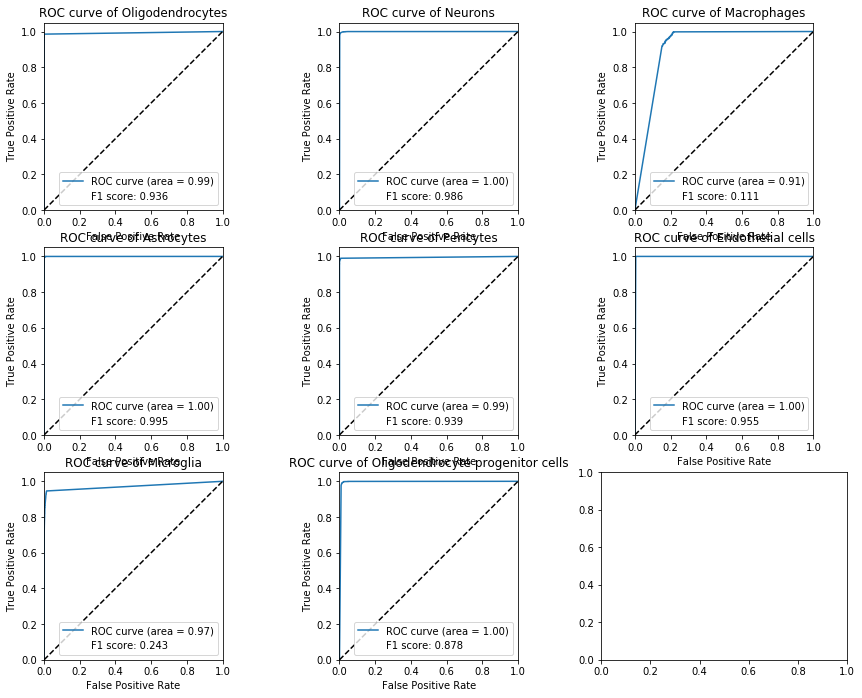

In [35]:
saly.draw_roc(hrvatin_data.obs['labels'], hrvatin_cell_activations_unspervised, markers, marker_aliases)

../saly/backend/analysis.py:104: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / (tp + fp)
../saly/backend/analysis.py:106: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * (recall * precision) / (recall + precision)


IndexError: list index out of range

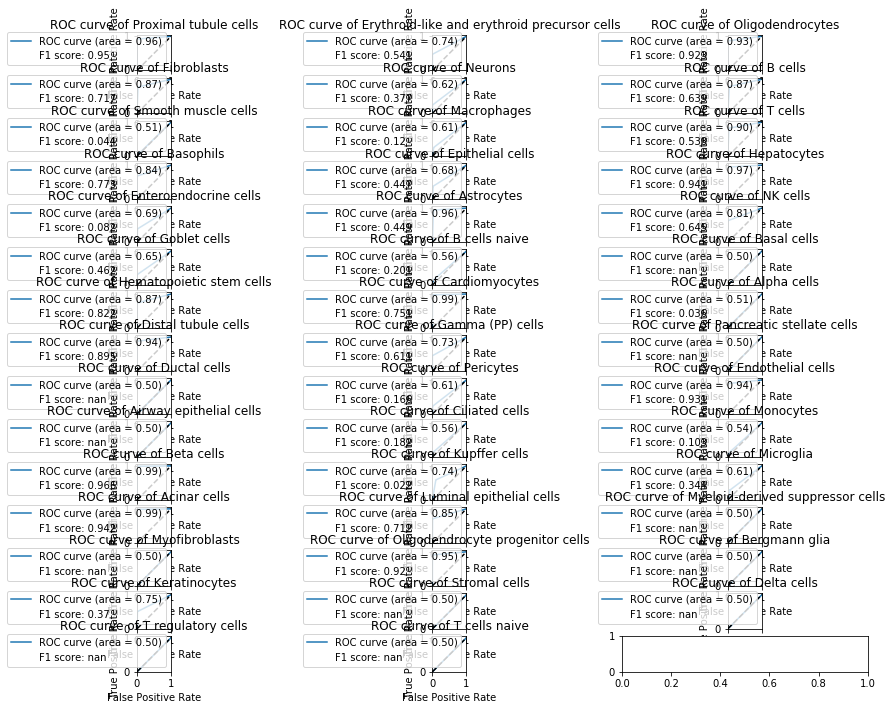

In [37]:
muris_cell_activations = marker_supervised.predict(muris_data.X)
saly.draw_roc(muris_data.obs['labels'], muris_cell_activations, markers, marker_aliases)